In [1]:
import pandas as pd

In [2]:
data = pd.read_excel('data_3.2.xlsx')
print(data.info())
print(data.shape)
data.head()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2555 entries, 0 to 2554
Data columns (total 8 columns):
 #   Column                  Non-Null Count  Dtype  
---  ------                  --------------  -----  
 0   helpfulness_category    2555 non-null   int64  
 1   corpus                  2555 non-null   int64  
 2   helpfulness_min-max标准化  2555 non-null   float64
 3   stars                   2555 non-null   int64  
 4   SS                      2555 non-null   int64  
 5   length                  2555 non-null   int64  
 6   LS                      2555 non-null   int64  
 7   Sentiment Score         2555 non-null   float64
dtypes: float64(2), int64(6)
memory usage: 159.8 KB
None
(2555, 8)


,helpfulness_category,corpus,helpfulness_min-max标准化,stars,SS,length,LS,Sentiment Score
0,3,1,1.000000,5,25,22,484,0.8555
1,3,2,0.636766,5,25,8,64,0.4588
2,3,3,0.406423,5,25,132,17424,0.9863
3,3,4,0.209302,5,25,16,256,0.8360
4,3,5,0.168882,5,25,5,25,0.6705


In [3]:
data['SS'] = data['stars']**2
data['LS'] = data['length']**2
data.head()

,helpfulness_category,corpus,helpfulness_min-max标准化,stars,SS,length,LS,Sentiment Score
0,3,1,1.000000,5,25,22,484,0.8555
1,3,2,0.636766,5,25,8,64,0.4588
2,3,3,0.406423,5,25,132,17424,0.9863
3,3,4,0.209302,5,25,16,256,0.8360
4,3,5,0.168882,5,25,5,25,0.6705


In [7]:
data = data.rename(columns={'helpfulness_min-max标准化':'helpfulness_std'})

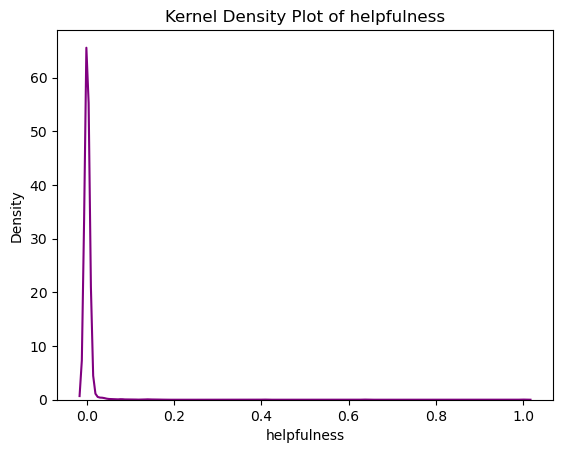

In [8]:
import seaborn as sns
import matplotlib.pyplot as plt


helpfulness_normalized = data["helpfulness_std"]

# 使用Seaborn绘制核密度分布图
sns.kdeplot(helpfulness_normalized, color='purple')

# 添加标题和轴标签
plt.title('Kernel Density Plot of helpfulness')
plt.xlabel('helpfulness')
plt.ylabel('Density')

# 显示图形
plt.show()

# 用随机森林算法建立模型进行回归，并计算预测准确度，最后实现可视化

In [17]:
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import r2_score, mean_squared_error
from sklearn.model_selection import GridSearchCV
from sklearn.tree import export_graphviz
import pydotplus

import matplotlib.pyplot as plt

In [18]:
# 准备自变量和因变量
X = data[["stars", "SS", "length", "LS", "Sentiment Score"]]
y = data["helpfulness_category"]

# 划分训练集和测试集
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# 建立随机森林回归模型
rf_model = RandomForestRegressor()

In [25]:
# 定义超参数空间
param_grid = {
    'n_estimators': [50, 100, 200],  # 决策树数量
    'max_depth': [None, 5, 10],  # 决策树最大深度
    'min_samples_split': [2, 5, 10]  # 最小样本拆分数
}

# 使用网格搜索进行超参数调优
grid_search = GridSearchCV(rf_model, param_grid, cv=5)
grid_search.fit(X_train, y_train)

# 打印最佳超参数组合
print("Best Parameters: ", grid_search.best_params_)

# 使用最佳超参数建立回归模型
best_rf_model = grid_search.best_estimator_

Best Parameters:  {'max_depth': 5, 'min_samples_split': 5, 'n_estimators': 200}


In [26]:
# 进行模型预测
y_pred = best_rf_model.predict(X_test)

# 计算模型准确率和召回率
r2 = r2_score(y_test, y_pred)
mse = mean_squared_error(y_test, y_pred)

print("R2 Score: ", r2)
print("Mean Squared Error: ", mse)

R2 Score:  0.224351544028223
Mean Squared Error:  0.36790880535399456


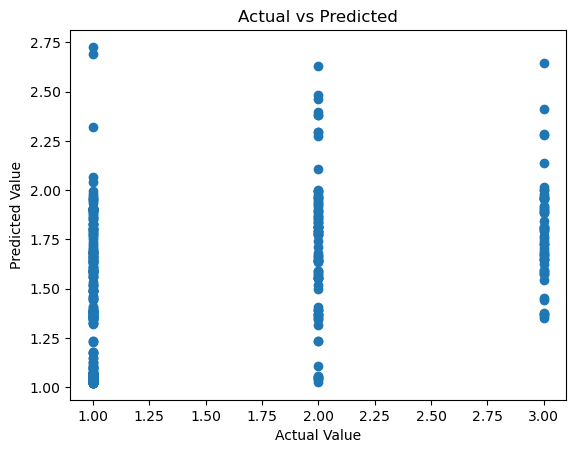

In [21]:
# 可视化实际值与预测值的关系
plt.scatter(y_test, y_pred)
plt.xlabel('Actual Value')
plt.ylabel('Predicted Value')
plt.title('Actual vs Predicted')
plt.show()

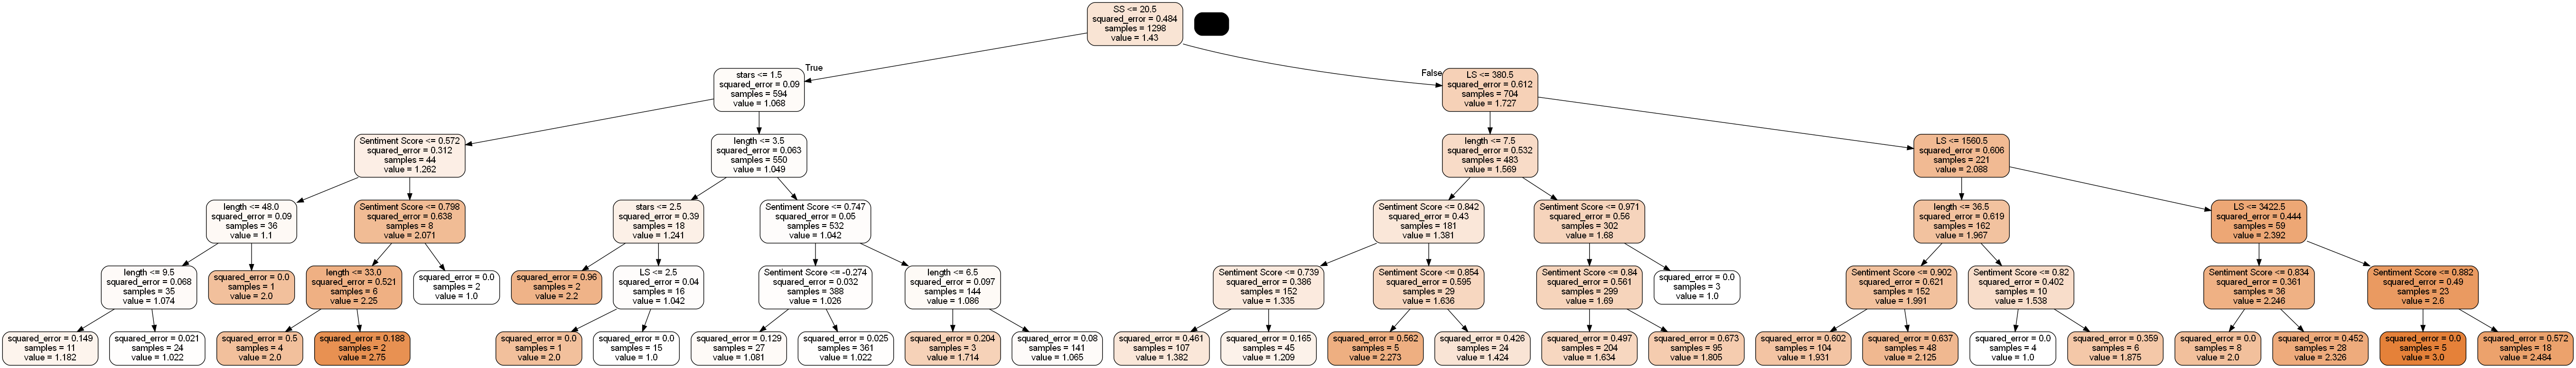

In [22]:
from sklearn.tree import export_graphviz
from IPython.display import Image
from graphviz import Source

estimator = best_rf_model.estimators_[0]
dot_data = export_graphviz(estimator, out_file=None, feature_names=X.columns, filled=True, rounded=True)
graph = pydotplus.graph_from_dot_data(dot_data)
# 使用Source类显示决策树图形
tree_graph = Source(graph.to_string())

# 显示图形
Image(tree_graph.pipe(format='png'))

In [27]:
errors = abs(y_pred - y_test)
is_less_than_threshold = errors < 0.5
probability = sum(is_less_than_threshold) / len(is_less_than_threshold)
print("概率:", probability)

概率: 0.62426614481409
